In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

In [4]:
def compute_prediction(X,weights):
    """
    ARGS - 
      X - ndarray - features
      W - ndarray - weights
    RETURNS - 
     Y - ndarray - predictions
     """
    return sigmoid(np.dot(X,weights))

In [56]:
def update_weights_gd(X_train,y_train,weights,learning_rate):
    """
    ARGS - 
      X_trian,y_trian - ndarray - (features,labels)
      weights - ndarray
      learning_rate -float
    Returns - 
      weights - updated weights
    """
    predictions = compute_prediction(X_train,weights)
    weights_delta = np.dot(X_train.T,y_train - predictions)
    weights += learning_rate / float(y_train.shape[0]) * weights_delta
    return weights

In [73]:
def compute_cost(X,y,weights):
    """
    ARGS - 
      X,y - ndarray - (features,labels)
      weights - ndarray
    RETURNS - 
      cost - float - log_loss
    """
    predictions = compute_prediction(X,weights)
    cost = np.mean( -y*np.log(predictions) - (1-y)*np.log(1 - predictions))
    return cost

In [84]:
def train_logistic_regression(X_train,y_train,max_itr,learning_rate,fit_intercept = False):
    """
    runs the logistic regression
    ARGS - 
      X_train,y_train - ndarray - (features,labels)
      max_itr - int - maximum iterations
      learning_rate - float
      fit_intercept - boolean - whether or not to include constant weight
    RETURN - 
      weights - ndarray - updated weights
    """
    if fit_intercept:
        intercept = np.ones(shape = (X_train.shape[0],1))
        X_train = np.hstack((intercept,X_train))
    weights = np.zeros(X_train.shape[1])
    for i in range(max_itr):
        weights = update_weights_gd(X_train,y_train,weights,learning_rate)
        if i %100 == 0:
            print("cost at {} iteration is {}".format(i,compute_cost(X_train,y_train,weights)))
    return weights        

In [85]:
def predict(X,weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0],1))
        X = np.hstack((intercept,X))
    return compute_prediction(X,weights)    

In [88]:

# A example
X_train = np.array([[6, 7],
                    [2, 4],
                    [3, 6],
                    [4, 7],
                    [1, 6],
                    [5, 2],
                    [2, 0],
                    [6, 3],
                    [4, 1],
                    [7, 2]])

y_train = np.array([0,
                    0,
                    0,
                    0,
                    0,
                    1,
                    1,
                    1,
                    1,
                    1])

In [89]:
weights = train_logistic_regression(X_train,y_train,max_itr=1000,learning_rate=0.1,fit_intercept=True)

cost at 0 iteration is 0.5744042371657099
cost at 100 iteration is 0.034460223392510314
cost at 200 iteration is 0.018265572708476157
cost at 300 iteration is 0.012493458388041109
cost at 400 iteration is 0.00951532913854744
cost at 500 iteration is 0.007693388060646923
cost at 600 iteration is 0.0064620943335143306
cost at 700 iteration is 0.0055735118468322594
cost at 800 iteration is 0.004901632254525041
cost at 900 iteration is 0.004375567740665121


In [90]:
X_test = np.array([[6, 1],
                   [1, 3],
                   [3, 1],
                   [4, 5]])

In [93]:
predictions = predict(X_test,weights)

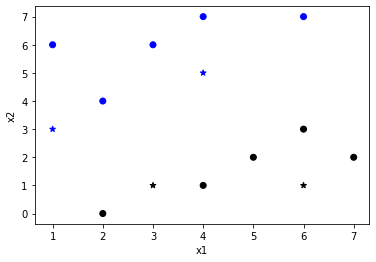

In [94]:
plt.scatter(X_train[:,0], X_train[:,1], c=['b']*5+['k']*5, marker='o')
colours = ['k' if prediction >= 0.5 else 'b' for prediction in predictions]
plt.scatter(X_test[:,0], X_test[:,1], marker='*', c=colours)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Preicting click through rate with logistic regression

In [95]:
import csv

In [98]:
def read_ad_click_data(n, offset=0):
    X_dict, y = [], []
    with open(r'E:\programming\dataset\click_throug_predictions\train\train.csv','r') as csvfile:
        reader = csv.DictReader(csvfile)
        for i in range(offset):
            next(reader)
        i = 0
        for row in reader:
            i += 1
            y.append(int(row['click']))
            del row['click'], row['id'], row['hour'], row['device_id'], row['device_ip']
            X_dict.append(row)
            if i >= n:
                break
    return X_dict, y


In [99]:
n = 10000
X_dict_train, y_train = read_ad_click_data(n)

In [100]:
from sklearn.feature_extraction import DictVectorizer
dict_one_hot_encoder = DictVectorizer(sparse=False)
X_train = dict_one_hot_encoder.fit_transform(X_dict_train)

X_dict_test, y_test = read_ad_click_data(n, n)
X_test = dict_one_hot_encoder.transform(X_dict_test)

X_train_10k = X_train
y_train_10k = np.array(y_train)

In [102]:
import timeit
start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_10k, y_train_10k, max_itr=10000, learning_rate=0.01, fit_intercept=True)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

cost at 0 iteration is 0.6820019456743648
cost at 100 iteration is 0.4608619713011896
cost at 200 iteration is 0.4503715555130051
cost at 300 iteration is 0.4455503890097847
cost at 400 iteration is 0.4420611414384596
cost at 500 iteration is 0.4393702812833892
cost at 600 iteration is 0.437228041454526
cost at 700 iteration is 0.4354781787758496
cost at 800 iteration is 0.43401801289720104
cost at 900 iteration is 0.4327779028622343
cost at 1000 iteration is 0.4317091585700226
cost at 1100 iteration is 0.43077673019057455
cost at 1200 iteration is 0.4299546928842355
cost at 1300 iteration is 0.42922339559221634
cost at 1400 iteration is 0.4285676184571522
cost at 1500 iteration is 0.42797535312823465
cost at 1600 iteration is 0.4274369752561037
cost at 1700 iteration is 0.42694466897530536
cost at 1800 iteration is 0.42649201676958726
cost at 1900 iteration is 0.42607370031421204
cost at 2000 iteration is 0.42568527750493995
cost at 2100 iteration is 0.42532301300292674
cost at 2200 i

In [103]:
X_test_10k = X_test

predictions = predict(X_test_10k, weights)
from sklearn.metrics import roc_auc_score
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test, predictions)))


The ROC AUC on testing set is: 0.711


In [104]:
# the score is better as compared to the one we recieved while using decision trees

# Stochastic gradient descent

In [108]:
def update_weights_sgd(X_train,y_train,weights,learning_rate):
    """
    updates weights with stochastic gradient descent
    ARGS - 
      X_trian,y_trian - ndarray - (features,labels)
      weights - ndarray
      learning_rate -float
    Returns - 
      weights - updated weights
    """
    for X_each,y_each in zip(X_train,y_train):
        prediction = compute_prediction(X_each,weights)
        weights_delta = X_each *(y_each - prediction)
        weights += learning_rate*weights_delta
    return weights    

In [109]:
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """ Train a logistic regression model
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Returns:
        numpy.ndarray, learned weights
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 2 (for example) iterations
        if iteration % 2 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [110]:
# Train the SGD model based on 10000 samples
start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_10k, y_train_10k, max_iter=5, learning_rate=0.01, fit_intercept=True)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))
predictions = predict(X_test_10k, weights)
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test, predictions)))

0.41496547913327814
0.4060071128286624
0.40104937451793143
--- 1.169s seconds ---
The ROC AUC on testing set is: 0.720


In [114]:
n = 100000
X_dict_train, y_train = read_ad_click_data(n)
dict_one_hot_encoder = DictVectorizer(sparse=False)
X_train = dict_one_hot_encoder.fit_transform(X_dict_train)

X_train_100k = X_train
y_train_100k = np.array(y_train)

In [ ]:
# Train the SGD model based on 100000 samples
start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_100k, y_train_100k, max_iter=5, learning_rate=0.01, fit_intercept=True)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))
